In [ ]:
import torch
print(torch.cuda.is_available(), torch.version.cuda)

In [ ]:
sudo docker run -it --gpus all -p 8000:8000 \
nvcr.io/nvidia/vllm:26.01-py3 \
vllm serve "Qwen/Qwen3-30B-A3B-Instruct-2507"

In [48]:
import re

def replace_skills(text, replacement="capability"):
    if replacement.endswith('y'):
        plural = replacement[:-1] + 'ies'
    else:
        plural = replacement + 's'
    
    text = re.sub(r"\bskill\b", replacement, text, flags=re.IGNORECASE)
    text = re.sub(r"\bskills?\b", plural, text, flags=re.IGNORECASE)
    return text

text = "Skill, skill; SKILL! Skills skillset (Skill). SKILLS, SkILlS, SkILl"
print(replace_skills(text, replacement="capability"))

print(replace_skills(text, replacement="ability"))

print(replace_skills(text, replacement="proficiency"))



capability, capability; capability! capabilities skillset (capability). capabilities, capabilities, capability
ability, ability; ability! abilities skillset (ability). abilities, abilities, ability
proficiency, proficiency; proficiency! proficiencies skillset (proficiency). proficiencies, proficiencies, proficiency


In [ ]:

print(text)

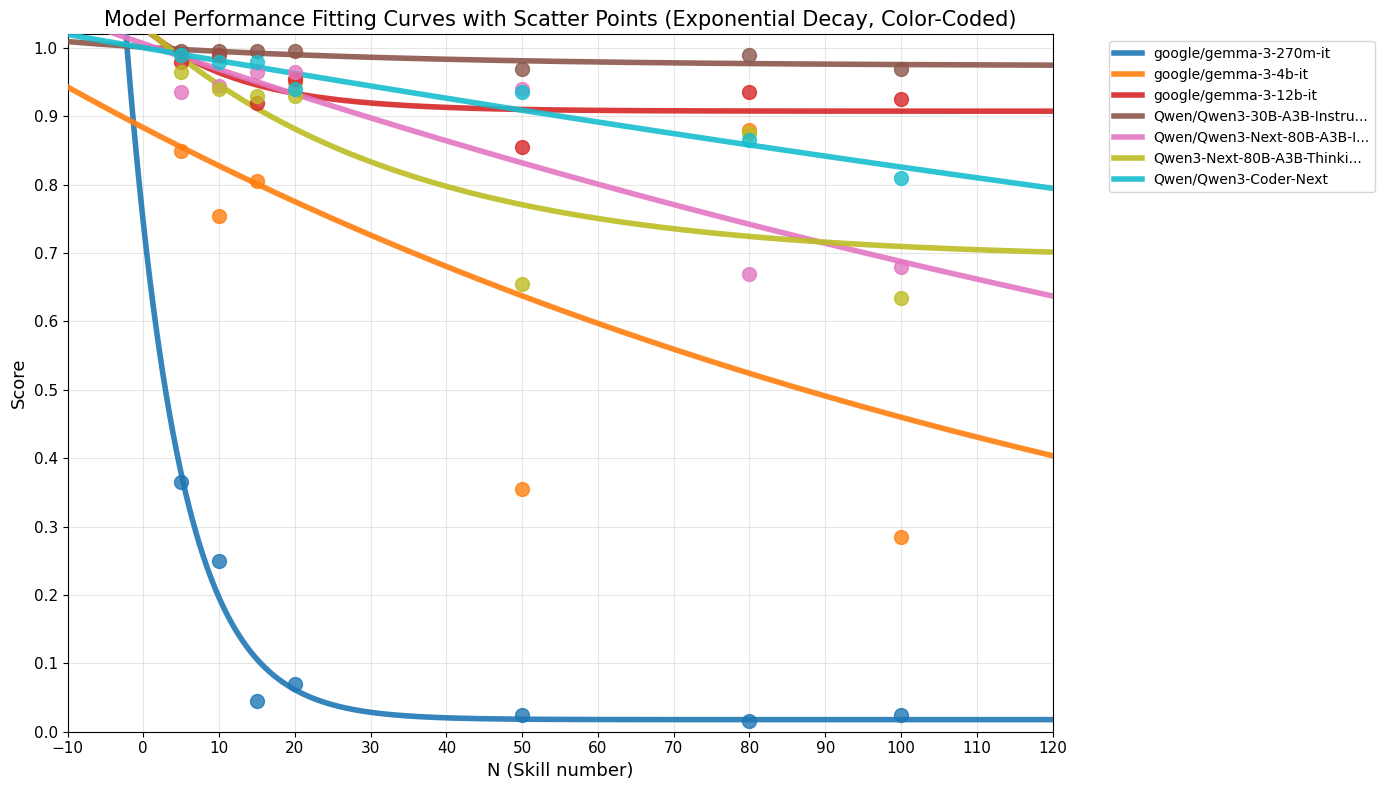

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import io
import warnings
warnings.filterwarnings('ignore')

# Data (你的数据)
data = """
Models,5,10,15,20,50,80,100
google/gemma-3-270m-it,0.365,0.250,0.045,0.070,0.025,0.015,0.025
google/gemma-3-4b-it,0.850,0.755,0.805,0.950,0.355,0.880,0.285
google/gemma-3-12b-it,0.980,0.990,0.920,0.955,0.855,0.935,0.925
Qwen/Qwen3-30B-A3B-Instruct-2507,0.995,0.995,0.995,0.995,0.970,0.990,0.970
Qwen/Qwen3-Next-80B-A3B-Instruct,0.935,0.945,0.965,0.965,0.940,0.670,0.680
Qwen3-Next-80B-A3B-Thinking,0.965,0.94,0.93,0.93,0.655,0.875,0.635
Qwen/Qwen3-Coder-Next,0.990,0.980,0.980,0.940,0.935,0.865,0.810
"""

df = pd.read_csv(io.StringIO(data))
skill_levels = np.array([5, 10, 15, 20, 50, 80, 100])

def exp_model(N, a, b, c):
    return a * np.exp(-b * N) + c

plt.figure(figsize=(14, 8))
colors = plt.cm.tab10(np.linspace(0, 1, len(df)))

for i, model in enumerate(df['Models']):
    scores = df.iloc[i, 1:].values.astype(float)
    short_name = model[:25] + '...' if len(model) > 25 else model
    
    # 添加散点图
    plt.scatter(skill_levels, scores, color=colors[i], s=100, alpha=0.8, zorder=5)
    
    try:
        popt, _ = curve_fit(exp_model, skill_levels, scores, 
                           p0=(0.5, 0.005, 0.3), 
                           bounds=([0, 0, 0], [2, 0.2, 1]),
                           maxfev=5000)
        N_smooth = np.linspace(-10, 120, 300)
        curve_smooth = exp_model(N_smooth, *popt)
        plt.plot(N_smooth, curve_smooth, color=colors[i], linewidth=4, alpha=0.9, zorder=4, label=short_name)
    except:
        N_smooth = np.linspace(-10, 120, 300)
        z = np.polyfit(skill_levels, scores, 3)
        curve_smooth = np.polyval(z, N_smooth)
        plt.plot(N_smooth, curve_smooth, color=colors[i], linewidth=4, alpha=0.9, zorder=4, label=f'{short_name} (poly)')

plt.xlabel('N (Skill number)', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.title('Model Performance Fitting Curves with Scatter Points (Exponential Decay, Color-Coded)', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(np.arange(-10, 121, 10), fontsize=11)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=11)
plt.xlim(-10, 120)
plt.ylim(0, 1.02)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('model_curves_with_scatter.png', dpi=300, bbox_inches='tight')
plt.show()


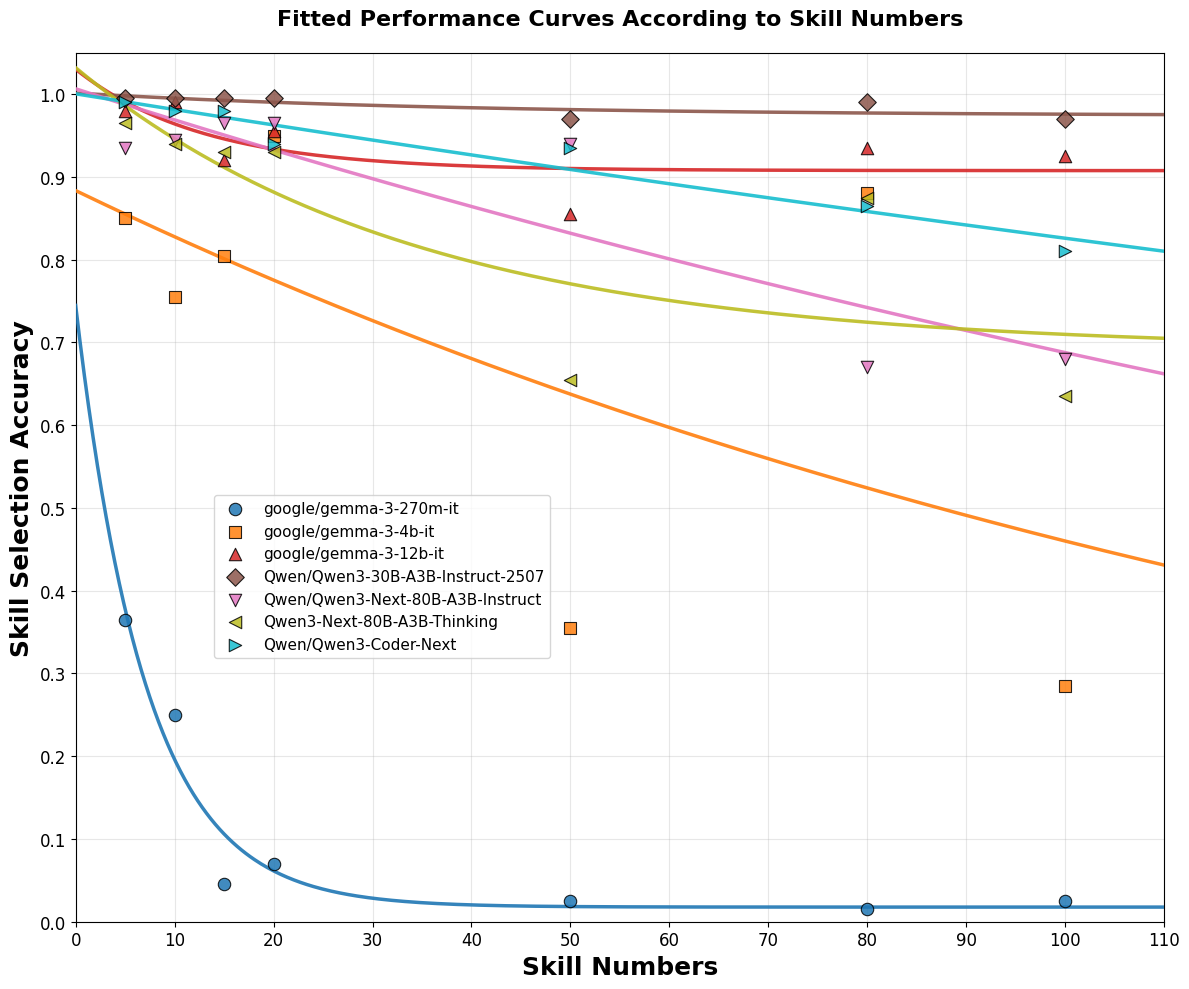

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import io
import warnings
warnings.filterwarnings('ignore')

data = """
Models,5,10,15,20,50,80,100
google/gemma-3-270m-it,0.365,0.250,0.045,0.070,0.025,0.015,0.025
google/gemma-3-4b-it,0.850,0.755,0.805,0.950,0.355,0.880,0.285
google/gemma-3-12b-it,0.980,0.990,0.920,0.955,0.855,0.935,0.925
Qwen/Qwen3-30B-A3B-Instruct-2507,0.995,0.995,0.995,0.995,0.970,0.990,0.970
Qwen/Qwen3-Next-80B-A3B-Instruct,0.935,0.945,0.965,0.965,0.940,0.670,0.680
Qwen3-Next-80B-A3B-Thinking,0.965,0.94,0.93,0.93,0.655,0.875,0.635
Qwen/Qwen3-Coder-Next,0.990,0.980,0.980,0.940,0.935,0.865,0.810
"""

df = pd.read_csv(io.StringIO(data))
skill_levels = np.array([5, 10, 15, 20, 50, 80, 100])

def exp_model(N, a, b, c):
    return a * np.exp(-b * N) + c

fig, ax = plt.subplots(figsize=(12, 10))
colors = plt.cm.tab10(np.linspace(0, 1, len(df)))
markers = ['o', 's', '^', 'D', 'v', '<', '>']

for i, model in enumerate(df['Models']):
    scores = df.iloc[i, 1:].values.astype(float)
    
    ax.scatter(skill_levels, scores, marker=markers[i], s=80, color=colors[i], 
               edgecolors='black', linewidth=0.8, alpha=0.85, zorder=5, label=model)
    
    try:
        popt, _ = curve_fit(exp_model, skill_levels, scores, p0=(0.5, 0.005, 0.3), 
                            bounds=([0, 0, 0], [2, 0.2, 1]), maxfev=5000)
        N_smooth = np.linspace(0, 110, 500)
        curve_smooth = exp_model(N_smooth, *popt)
        ax.plot(N_smooth, curve_smooth, color=colors[i], linewidth=2.5, alpha=0.9, zorder=4)
    except:
        N_smooth = np.linspace(0, 110, 500)
        z = np.polyfit(skill_levels, scores, 3)
        curve_smooth = np.polyval(z, N_smooth)
        ax.plot(N_smooth, curve_smooth, '--', color=colors[i], linewidth=2.5, alpha=0.9, zorder=4)

ax.set_xlabel('Skill Numbers', fontsize=18, fontweight='bold')
ax.set_ylabel('Skill Selection Accuracy', fontsize=18, fontweight='bold')
ax.set_title('Fitted Performance Curves According to Skill Numbers', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(0.12, 0.5), loc='upper left', fontsize=11, frameon=True)
ax.set_xlim(0, 110)
ax.set_ylim(0, 1.05)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.8)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(np.arange(0, 111, 10))
ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.savefig('academic_model_performance.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('skill_selection_performance.pdf', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
